In [1]:
import os
import time
import json

import numpy as np
import skimage

import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

from dice import dice_coef, dice_loss
from predict import predict_mask
from visualize import display_slice_from_batch

Using TensorFlow backend.
c:\users\gauth\appdata\local\continuum\anaconda3\envs\pylattice_3d_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\gauth\appdata\local\continuum\anaconda3\envs\pylattice_3d_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\gauth\appdata\local\continuum\anaconda3\envs\pylattice_3d_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)

In [9]:
image_path = "quickstart-data/series2-4.tif"
truth_path = "series2-4_DUP_edit2.tif"
model_path = "jan30_largeframe_32_nonzero_standardized_local.h5"

# Use the same patch_size that was used for training
patch_size = 32

In [3]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model(model_path, custom_objects={'dice': dice_loss(), 'dice_coef': dice_coef})

In [4]:
# Uses the overloaded predict_mask method which can detect the correct size
start = time.time()
mask = predict_mask(model, image_path, patch_size, offset=np.asarray([0,0,0]))
end = time.time()
print("Time to complete: " + str(end - start))

Image cropped to: 32, 1024, 1024
Time to complete: 38.288262605667114


<Figure size 2160x2160 with 0 Axes>

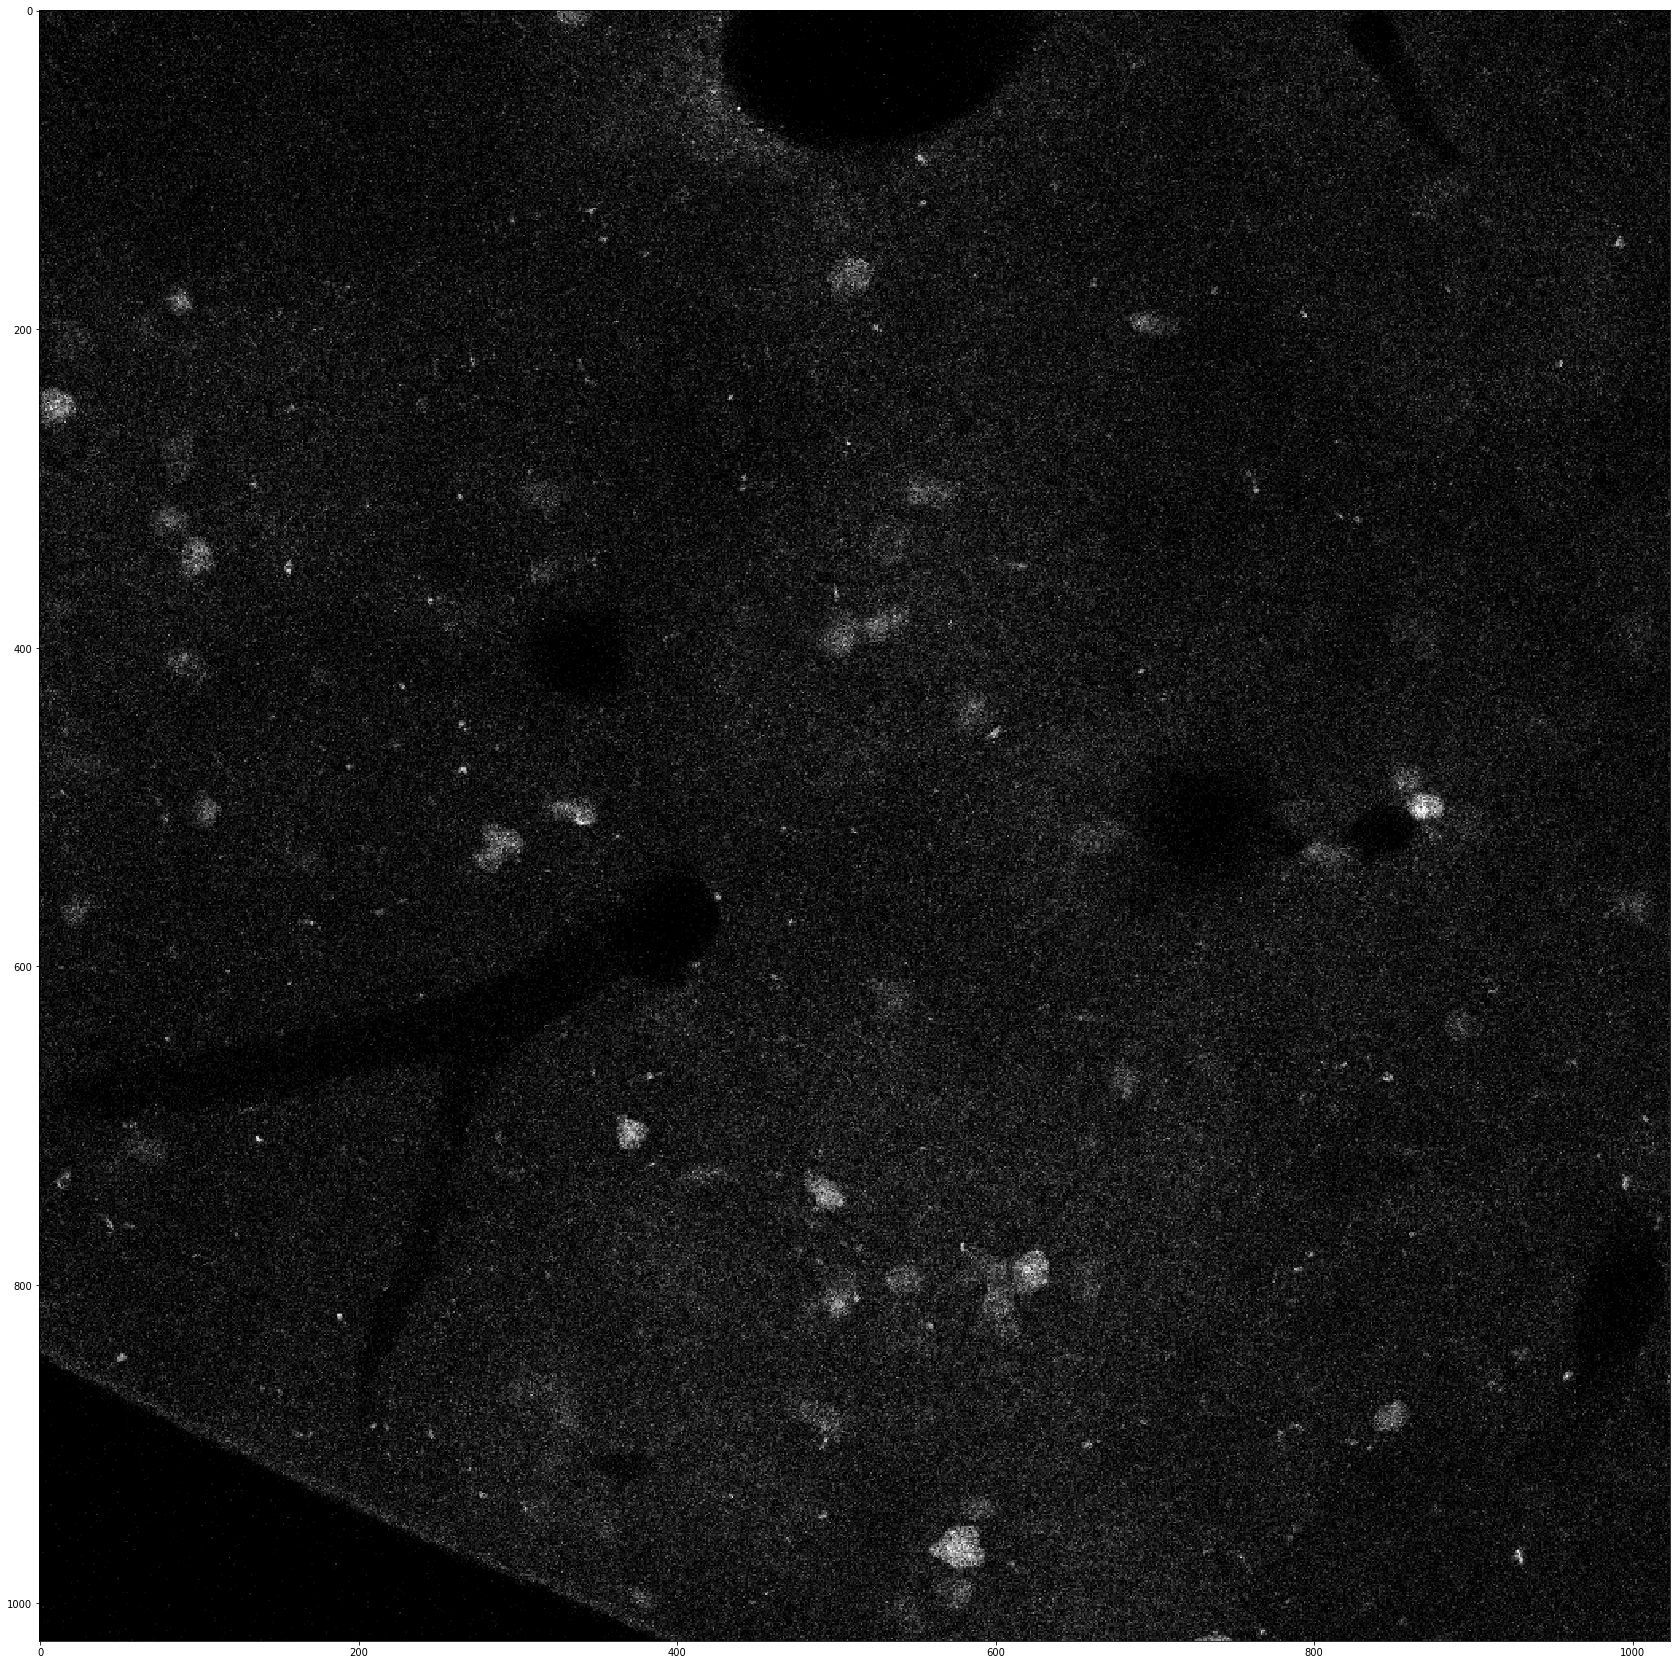

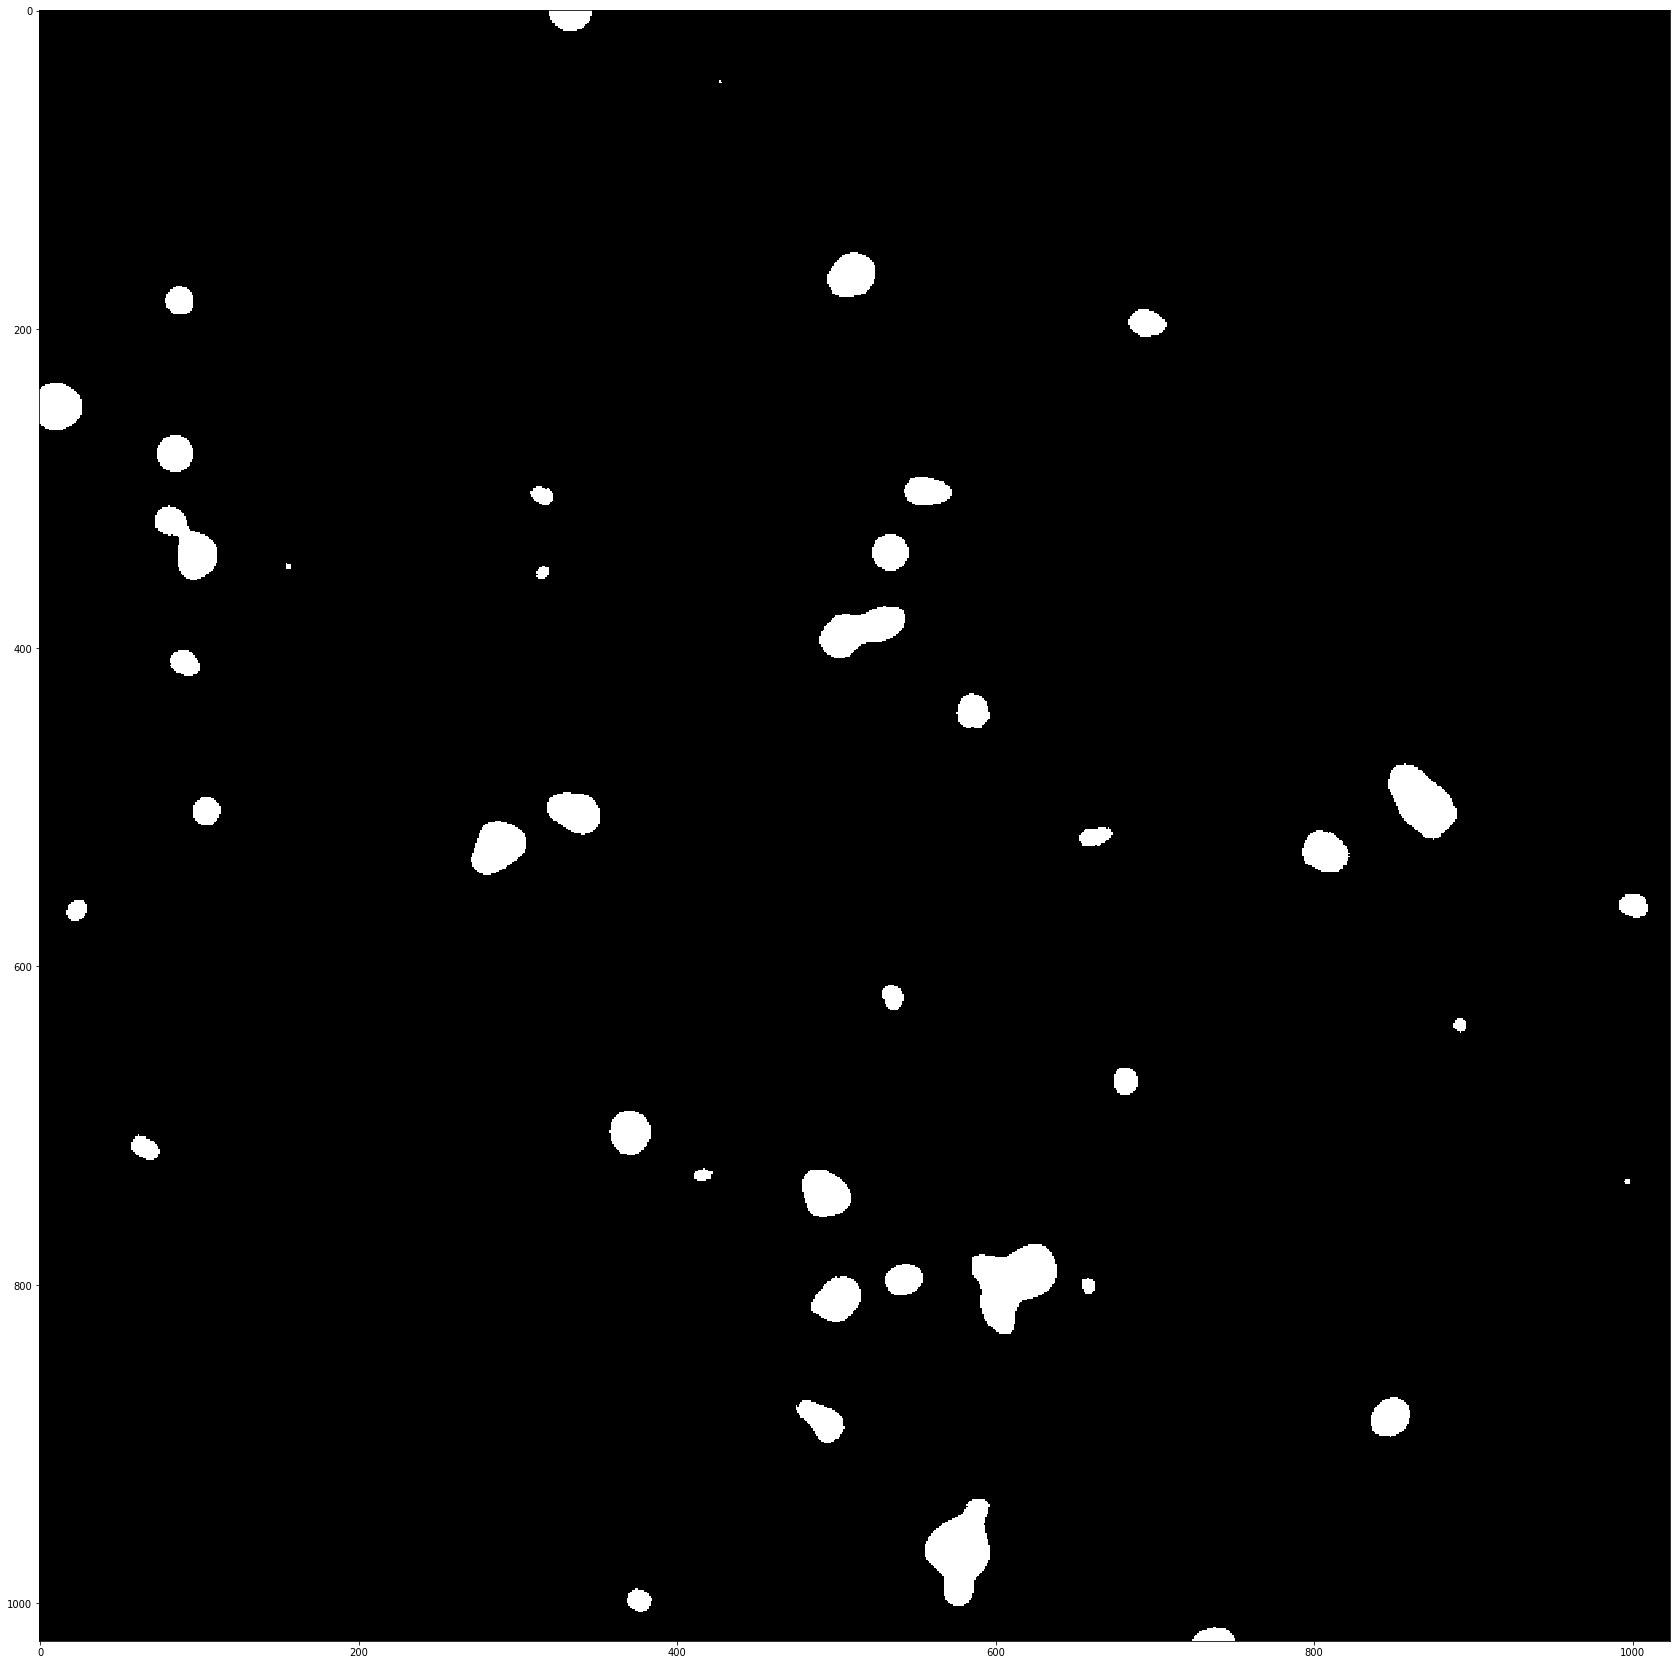

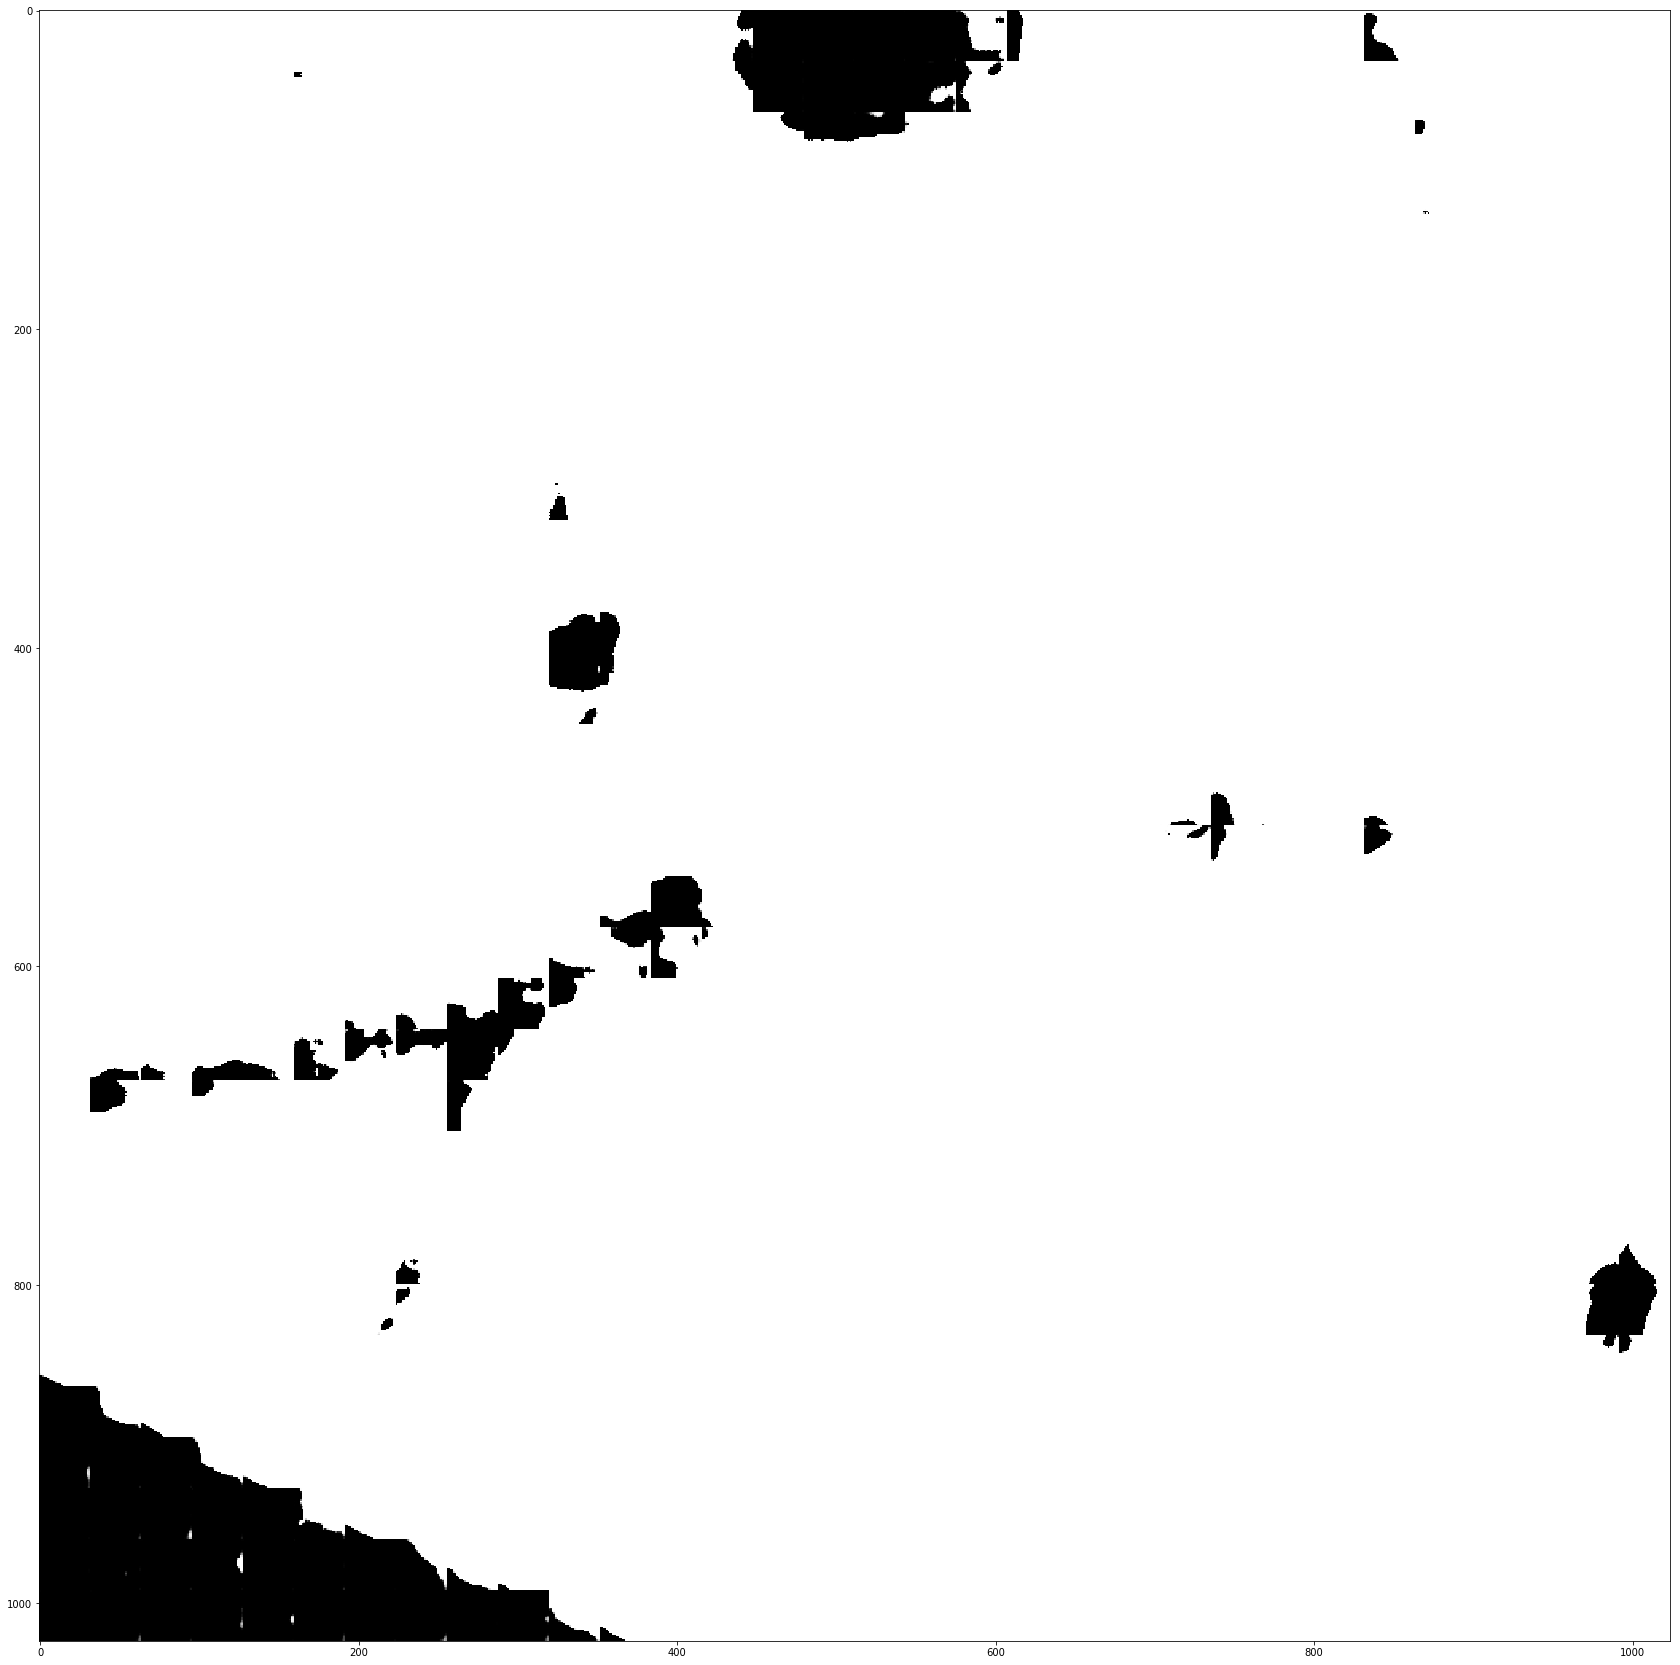

In [10]:
# View your prediction file

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]
plt.set_cmap('gray')
z=5

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:mask.shape[1], :mask.shape[2], :mask.shape[3]].reshape(mask.shape), z=z)
display_slice_from_batch(skimage.external.tifffile.imread(truth_path)[:mask.shape[1], :mask.shape[2], :mask.shape[3]].reshape(mask.shape), z=z)
display_slice_from_batch(mask, z=z)

In [24]:
# Run the following if you intend to DOWNLOAD the predicted tif file (optional)
prediction_file = (mask*255.0).astype('uint16')
metadata = dict(microscope='joh', shape=prediction_file.shape, dtype=prediction_file.dtype.str)
metadata = json.dumps(metadata)

# Change name of file
skimage.external.tifffile.imsave("Production2_PSNR100prediction.tif", prediction_file, description=metadata)    